In [108]:
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures

# **Objective**

The objective of this project is to develop a machine learning model that can predict the selling price of used cars based on their features such as manufacturing year, kilometers driven, fuel type, transmission, ownership, and brand. By applying Linear Regression, the goal is to establish a relationship between these independent variables and the car's price, which can help car dealers, buyers, and sellers make data-driven decisions in the used car market.


In [110]:
df=pd.read_csv(r"D:\Pallavi\IT Vedant\ML\Project\car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [111]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [112]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [113]:
df.shape

(301, 9)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [115]:
#numerical stats
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [116]:
#missing values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Data Processing

In [117]:
df['Age'] = 2020 - df['Year']
df.drop('Year',axis= 1,inplace = True)

In [118]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

In [119]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [120]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [121]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [122]:
df.drop('Car_Name', axis=1, inplace=True)

In [123]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [124]:
#using one-hot encoding to convert categorial col to numeric col (0/1)
from sklearn.preprocessing import OneHotEncoder

In [125]:
ohe=OneHotEncoder()

In [126]:
ohe.fit_transform(df[['Transmission']]).toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [127]:
ohe.fit_transform(df[['Seller_Type']]).toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [128]:
ohe.fit_transform(df[['Fuel_Type']]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [129]:
df = pd.get_dummies(data=df, drop_first=False, dtype=int)

In [130]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,6,0,1,0,1,0,0,1


In [131]:
numeric_df.corr()['Selling_Price(lacs)']

Selling_Price(lacs)       1.000000
Present_Price(lacs)       0.878983
Kms_Driven                0.029187
Past_Owners              -0.088344
Age                      -0.236141
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Transmission_Manual      -0.367128
Name: Selling_Price(lacs), dtype: float64

In [132]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type_Individual', columns= ['Fuel_Type_Diesel', 'Fuel_Type_Petrol'])

Fuel_Type_Diesel          0                    1
Fuel_Type_Petrol          0         1          0
Seller_Type_Individual                          
0                       3.1  5.252388  10.181525
1                       NaN  0.726857  16.000000

In [133]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type_Individual', columns= ['Transmission_Manual', 'Transmission_Automatic'])

Transmission_Manual,0,1
Transmission_Automatic,1,0
Seller_Type_Individual,,
0,12.246552,5.756506
1,1.968182,0.743895


# Removing Outliers

In [134]:
df['Past_Owners'].value_counts()

Past_Owners
0    290
1     10
3      1
Name: count, dtype: int64

outliers gives us insights into data quality, variability, detect error and unusual behavior

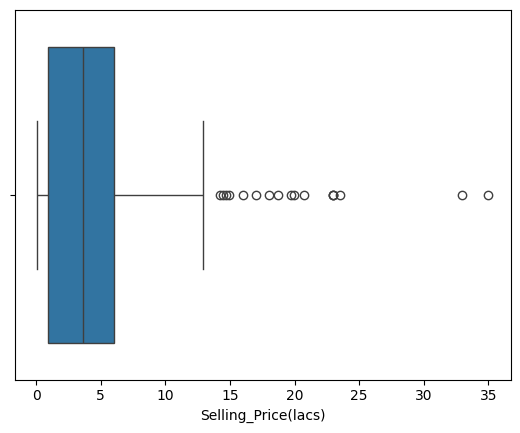

In [135]:
sns.boxplot(x=df['Selling_Price(lacs)'])
plt.show()

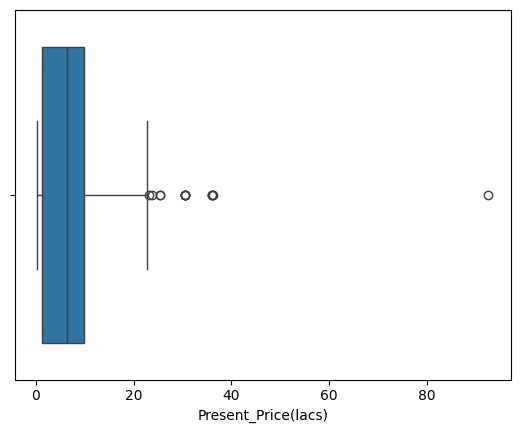

In [136]:
sns.boxplot(x=df['Present_Price(lacs)'])
plt.show()

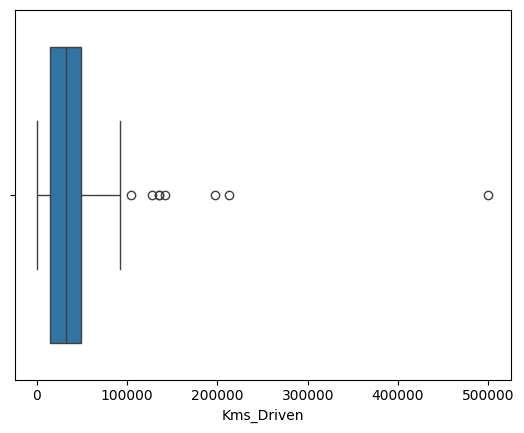

In [137]:
sns.boxplot(x=df['Kms_Driven'])
plt.show()

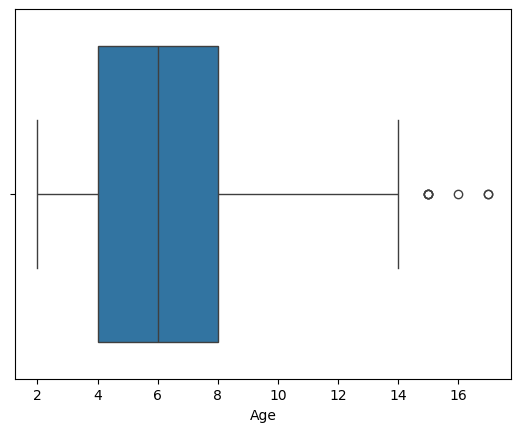

In [138]:
sns.boxplot(x=df['Age'])
plt.show()

In [139]:
df[df['Present_Price(lacs)'] > df['Present_Price(lacs)'].quantile(0.99)]

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
64,33.0,36.23,6000,0,3,0,1,0,1,0,1,0
86,35.0,92.60,78000,0,10,0,1,0,1,0,0,1


In [140]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]


,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
63,23.5,35.96,47000,0,5,0,1,0,1,0,1,0
64,33.0,36.23,6000,0,3,0,1,0,1,0,1,0
86,35.0,92.60,78000,0,10,0,1,0,1,0,0,1


In [141]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
84,3.49,13.46,197176,0,15,0,1,0,1,0,0,1
179,0.31,1.05,213000,0,10,0,0,1,0,1,0,1
196,0.17,0.52,500000,0,12,0,0,1,0,1,1,0


In [142]:
df[df['Age'] > df['Age'].quantile(0.99)]

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
37,0.35,2.28,127000,0,17,0,0,1,0,1,0,1
39,2.25,7.98,62000,0,17,0,0,1,1,0,0,1
77,1.50,12.35,135154,0,16,0,0,1,1,0,1,0


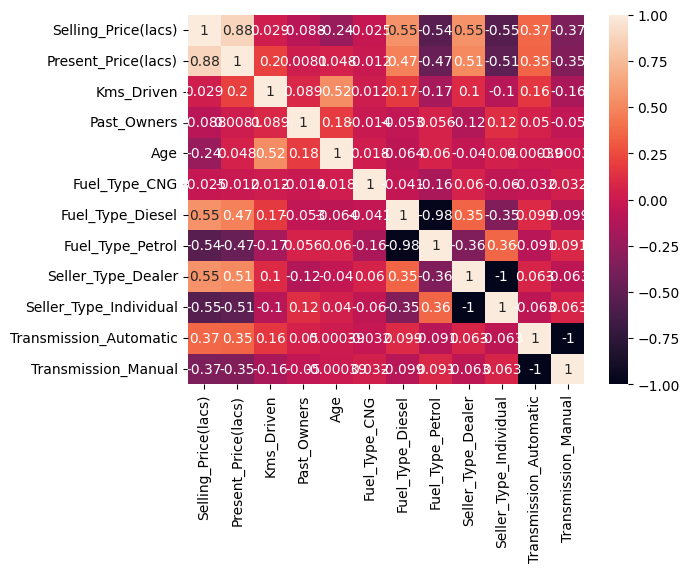

In [143]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

In [144]:
#split dataset into train nd test
X=df.drop('Selling_Price(lacs)',axis=1)
y=df[['Selling_Price(lacs)']]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [146]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Present_Price(lacs)     301 non-null    float64
 1   Kms_Driven              301 non-null    int64  
 2   Past_Owners             301 non-null    int64  
 3   Age                     301 non-null    int64  
 4   Fuel_Type_CNG           301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    int64  
 6   Fuel_Type_Petrol        301 non-null    int64  
 7   Seller_Type_Dealer      301 non-null    int64  
 8   Seller_Type_Individual  301 non-null    int64  
 9   Transmission_Automatic  301 non-null    int64  
 10  Transmission_Manual     301 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.0 KB


In [147]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Selling_Price(lacs)  301 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [148]:
X_train.shape

(240, 11)

In [149]:
y_train.shape

(240, 1)

In [150]:
X_test.shape

(61, 11)

In [151]:
y_test.shape

(61, 1)

In [152]:
#model building
lr=LinearRegression()

In [153]:
#fit 80% data into model
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [154]:
lr.intercept_

array([4.77732114])

In [155]:
lr.coef_

array([[ 4.37233976e-01, -5.30613944e-06,  3.45912849e-01,
        -4.13270098e-01, -8.96352304e-01,  1.33415539e+00,
        -4.37803087e-01,  6.04639070e-01, -6.04639070e-01,
         9.35071633e-01, -9.35071633e-01]])

In [156]:
ypred=lr.predict(X_train)
ypred

array([[ 2.31704897e+00],
       [ 1.05163363e+01],
       [ 6.20814665e+00],
       [-1.06078712e+00],
       [ 9.96478209e-01],
       [ 1.43640299e-01],
       [ 5.27322395e-01],
       [ 7.27105805e+00],
       [-3.98904720e-02],
       [ 7.46755769e+00],
       [ 8.61755418e+00],
       [ 8.45780695e+00],
       [ 8.95277254e-01],
       [ 1.33240533e+00],
       [ 1.86831115e+00],
       [ 2.08700552e+00],
       [ 8.24412576e+00],
       [ 9.24152474e+00],
       [ 4.22694570e+00],
       [ 3.94652427e+00],
       [ 1.89316660e+00],
       [ 1.02767156e+01],
       [ 1.02111196e+01],
       [ 1.70706741e+00],
       [ 6.58675295e+00],
       [ 2.18145255e+00],
       [ 1.44752842e+00],
       [ 1.45937116e+00],
       [ 6.29264381e+00],
       [ 4.44566215e+00],
       [ 5.63779787e+00],
       [ 3.14561460e+00],
       [ 2.20473291e+00],
       [ 1.00274779e+01],
       [ 9.95038120e+00],
       [-1.72633003e-01],
       [ 1.61377713e+00],
       [ 4.51488425e-01],
       [ 7.9

In [157]:
ypred_test=lr.predict(X_test)
ypred_test

array([[ 7.86273200e+00],
       [ 2.96828691e+00],
       [-5.90305107e-01],
       [ 4.21335952e+00],
       [ 4.83175534e-01],
       [ 5.82053813e+00],
       [ 1.95679784e+00],
       [ 2.55809661e+00],
       [ 7.70870833e+00],
       [ 9.78692192e-01],
       [ 8.13484343e+00],
       [ 3.51207180e+00],
       [ 4.90669281e+00],
       [ 4.63905587e+00],
       [-2.15886643e+00],
       [ 3.13874624e+00],
       [ 7.98256903e+00],
       [ 6.75937638e+00],
       [ 6.90426580e+00],
       [ 8.01440587e+00],
       [ 4.31168610e+00],
       [ 4.00336757e+00],
       [ 1.13040883e+01],
       [ 8.07939189e+00],
       [ 9.54399823e+00],
       [ 3.52133877e+00],
       [ 3.80609808e+00],
       [ 1.06074722e+00],
       [-6.01732475e-01],
       [-6.19712043e-01],
       [ 1.32818516e-03],
       [-1.28500691e+00],
       [ 4.28533553e+00],
       [ 2.06769487e+01],
       [ 1.87563232e+01],
       [ 4.27292100e+00],
       [ 3.48602852e+00],
       [ 1.66739677e+00],
       [-4.3

# Evaluation RMSE MSE MAE R2 Score

In [158]:
mse=mean_squared_error(y_train,ypred)
mse

3.151895229874222

In [159]:
mse1=mean_squared_error(y_test,ypred_test)
mse1

2.982384861859748

In [160]:
rmse=np.sqrt(mse)
rmse

np.float64(1.7753577751749707)

In [161]:
rmse1=np.sqrt(mse1)
rmse1

np.float64(1.726958268708236)

In [162]:
mae=mean_absolute_error(y_train,ypred)
mae

1.207224267115645

In [163]:
mae1=mean_absolute_error(y_test,ypred_test)
mae1

1.0998575552990955

In [164]:
r2=r2_score(y_train,ypred)
r2

0.8822783397439672

In [165]:
r2_1=r2_score(y_test,ypred_test)
r2_1

0.8625260513315253

In [166]:
#analytics--->as training score>testing score--->overfitting issue
#when model is overfitting,then there is need of regularization(L1 and L2)
#Regularization (Lasso-->L1,Ridge-->L2)

In [167]:
l2=Ridge(1)
l2.fit(X_train,y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [168]:
l2.score(X_test,y_test)

0.8641539126577752

In [169]:
#check Ridge value with different iteration
for i in range(10,20):
    l2=Ridge(i)
    l2.fit(X_train,y_train)
    sc=l2.score(X_test,y_test)
    print(sc)

0.8718636419954048
0.8723287757808699
0.8727509282683641
0.8731349195784451
0.8734848240118112
0.8738041205923572
0.874095807014923
0.8743624870598559
0.8746064385391953
0.8748296667782094


In [170]:
l1=Lasso(1)
l1.fit(X_train,y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [171]:
l1.score(X_test,y_test)

0.8544763192780581

In [172]:
for i in range(10,20):
    l1=Ridge(i)
    l1.fit(X_train,y_train)
    sc=l1.score(X_test,y_test)
    print(sc)

0.8718636419954048
0.8723287757808699
0.8727509282683641
0.8731349195784451
0.8734848240118112
0.8738041205923572
0.874095807014923
0.8743624870598559
0.8746064385391953
0.8748296667782094


# Random Forest

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [174]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=80, max_depth=8, random_state=1)

# Fit the model
rf.fit(X_train, y_train)

C:\Users\Saurabh Ande\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,80
,criterion,'squared_error'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [175]:
ypred_rf = rf.predict(X_test)

In [176]:
ypred_rf

array([ 6.52800935,  2.88784121,  0.50217517,  2.97560745,  1.07294613,
        5.34865882,  0.79453293,  3.10280952,  8.97913067,  0.58515994,
        8.46312618,  3.65029092,  5.30940944,  4.20417734,  0.17781   ,
        0.3942464 ,  7.339243  ,  5.2492711 ,  5.01443167,  7.38840967,
        5.09338385,  3.77170759,  7.6040625 ,  7.53274459, 11.05175   ,
        3.27023277,  3.03976042,  0.63012794,  0.23073512,  0.458471  ,
        0.27984229,  0.23090215,  5.16798127, 24.69375   , 21.73      ,
        4.1779065 ,  3.1646942 ,  0.93502667,  0.28188574,  3.84666592,
        9.28882026, 10.66829715,  0.28973108,  4.33563971,  4.41305588,
        4.54363262,  6.06732021,  7.59531768,  7.63093205,  1.15855505,
        4.93676824,  0.44571582,  2.84358377,  4.25344644,  1.14708466,
        0.14860702, 22.5275    ,  0.61304978,  6.03773664,  5.92378249,
        0.26454372])

In [177]:
mse_rf=mean_squared_error(y_test,ypred_test)
mse_rf

2.982384861859748

In [178]:
RMSE_rf=np.sqrt(mse_rf)
RMSE_rf

np.float64(1.726958268708236)

In [179]:
mae_rf=mean_absolute_error(y_test,ypred_test)
mae_rf

1.0998575552990955

In [180]:
r2_rf=r2_score(y_test,ypred_test)
r2_rf

0.8625260513315253

In [181]:
ypred1_rf = rf.predict(X_train)

In [182]:
ypred1_rf

array([ 1.59407731, 13.65569048,  5.08269644,  0.47340424,  0.63976551,
        2.26723586,  0.40218619,  4.58876667,  0.25389457,  9.07285977,
        7.8803263 ,  6.15186012,  0.41258232,  1.15696695,  2.16950372,
        1.68469133, 10.33571638,  8.63048487,  4.92109388,  2.89897342,
        1.17097604,  9.28145833, 11.72602034,  1.16205991,  5.58764972,
        2.80675639,  0.62720716,  0.71934558,  7.3485124 ,  5.24624448,
        6.19363375,  2.69974628,  2.32990997, 10.38019097, 11.56358185,
        0.51595014,  1.46363706,  0.50295852,  0.54966457,  0.91807042,
        9.35062164,  2.59073918, 15.81083333,  3.90815848,  0.28821151,
        1.05457305,  1.1611053 ,  1.11531613,  9.45583333,  4.14950249,
        7.88014433,  5.09750395,  0.2658834 ,  4.55426348,  2.57423178,
        0.44042646,  3.84013333,  2.17321429,  5.14628707,  0.41130732,
        5.91733523,  6.02358849,  0.53690101,  5.1758846 ,  6.19697832,
       21.73      ,  0.4282705 ,  3.31916815,  4.7113252 , 24.86

In [183]:
mse1_rf=mean_squared_error(y_train,ypred1_rf)
mse1_rf

0.4667810822479853

In [184]:
RMSE1_rf=np.sqrt(mse1_rf)
RMSE1_rf

np.float64(0.6832137895622317)

In [185]:
mae1_rf=mean_absolute_error(y_train,ypred1_rf)
mae1_rf

0.2869198880559099

In [186]:
r2_rf_1=r2_score(y_train,ypred1_rf)
r2_rf_1

0.9825659674669663

# **Conclusion**

From the analysis and model building:

The Linear Regression model was able to capture the relationship between car attributes (like age, mileage, fuel type, etc.) and their selling price.

Features such as year of manufacture, kilometers driven, and fuel type played a significant role in determining the car’s price.

The trained model can be used to estimate the fair market value of a used car, which helps avoid overpricing or underpricing in the resale market.

Although Linear Regression provides a baseline solution, the prediction accuracy could be further improved using advanced models such as Random Forest, Gradient Boosting, or XGBoost.